In [ ]:
import numpy
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt

arbres = pa.read_csv("./p2-arbres-fr.csv", sep=";")
# print(arbres)
arbres.head()

In [ ]:
arbres.libelle_francais.head(20).unique()

In [ ]:
from collections import Counter

labels_unique=arbres.libelle_francais.unique()
labels=arbres.libelle_francais
somme_genre = arbres.libelle_francais.value_counts()
somme_genre_norm = arbres.libelle_francais.value_counts(normalize=True)
distribution = dict()
total = somme_genre.sum()
frequences_list = []
values_list =[]
names_list = []
for key, value in somme_genre.items():
  frequence = value/total
  distribution[f"{key}"] = [value, frequence]
distribution

for key, value in somme_genre.items():
   frequences_list.append(value/total)
   values_list.append(value)
   names_list.append(key)
frequences_list
values_list
names_list
somme_genre.describe()
#test = somme_genre.where)(somme_genre.values < 3500).dropna()
#test
# total

In [ ]:
np_distr = np.array([[key,value] for (key,value) in somme_genre.iteritems()])
np_distr[:5]

In [ ]:
np_frequences = np.array([frequences_list])
np_values = np.array([values_list])
np_names = np.array([names_list])
np_dtr_f_str = np.concatenate((np_distr,np_frequences.T),axis=1)
np_dtr_f_str[:5]

In [100]:
var = np_frequences.dtype
seuil_mini = 3500
np_val_f = np.concatenate((np_values,np_frequences),axis=0)
np.where(np_val_f>10000)
np_val_f.dtype
np_val_f.shape
np_distribution = np.array([distribution])
test3 = somme_genre[:(len(somme_genre)-10)]
#test3mask[[occurence.where(somme_genre.values < seuil_mini)]] = False
#result = occurence[test3mask,...]

test1 = somme_genre.where(somme_genre.values < seuil_mini).sum()

In [101]:
test2 = somme_genre.head(10)
test3
autres_sommes = somme_genre.tail(len(somme_genre)-10).sum()


In [102]:
test4 = ['autres',10]

In [ ]:
test2.loc['autres']=test1
#test3 = pa.DataFrame('libelle_francais':test2[0], 'somme':test2[1], frequence = np_frequences)

np_frequences = np.array([frequences_list])
np_values = np.array([values_list])
np_names = np.array([names_list])
type(np_frequences)
np_frequences
np_values
# print(np_names[0])
test5 = pa.DataFrame({'libelle_francais':np_names[0], 'somme_genre':np_values[0], 'frequence':np_frequences[0]})
type(test5)
test6 = pa.DataFrame({'somme_genre':somme_genre[:], 'frequence':np_frequences[0]})
len(test6)
type(test6)
type(somme_genre)
somme_genre
test6

In [ ]:
somme_genre_df = pa.DataFrame({'somme_genre':somme_genre, 'frequence':np_frequences[0]})
autres = somme_genre_df.where(somme_genre_df.values < 3500).dropna()
valeur = somme_genre_df[:10].keys
seuil_mini = 3500
occur_sum = somme_genre_df.tail(len(somme_genre_df)-10).sum()
occur_head = somme_genre_df.head(10)
occur_head.loc['autres'] = occur_sum
occur_head.sort_values('somme_genre')

In [ ]:
occur_head.plot.pie(
    y='somme_genre',
    figsize =(15,15),
    subplots=False,
    explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1],
    autopct = lambda x: str(round(x, 2)) + '%',
    center = (1,0),
    labeldistance = 1.2,
    pctdistance = 0.8,
    shadow = True)


a utulise pour la futur representation hauteur localisation densite sur le territoire


In [ ]:
occur_head.plot.bar(y='frequence')

In [ ]:
occur_head.plot.hist(y='frequence',density=True, bins=11)

In [ ]:
occur_head.plot.hist(y='somme_genre',bins=11)

In [ ]:
arbres.describe()

In [ ]:
arbres.head()

In [ ]:
hauteurs = arbres["hauteur_m"]
hauteurs_clean = hauteurs.where((0 < hauteurs) & (hauteurs <= 45))
hauteurs_count = hauteurs_clean.value_counts()
hauteurs_count

In [ ]:
modalites = hauteurs_count.index
tab = pa.DataFrame(modalites, columns=["hauteur_m"])
tab

In [ ]:
tab["n"] = hauteurs_count.values
tab

In [ ]:
tab["f"] = tab["n"] / len(hauteurs_clean)
tab

In [ ]:
tab = tab.sort_values("hauteur_m")
tab["F"] = tab["f"].cumsum()
tab

In [ ]:
tab.describe()

<AxesSubplot:>

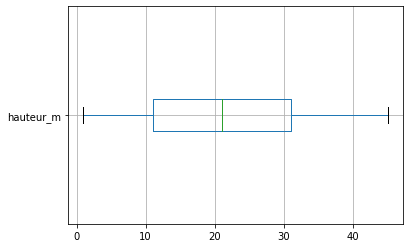

In [134]:
tab.boxplot('hauteur_m', vert=False)

In [ ]:
for name in arbres['libelle_francais'].head(10).unique():
    subset = arbres[arbres.libelle_francais == name]
    print("-"*20)
    print(name)
    # print(subset.describe())
    print("moy:\n",subset['hauteur_m'].mean())
    print("med:\n",subset['hauteur_m'].median())
    print("mod:\n",subset['hauteur_m'].mode())
    print("var:\n",subset['hauteur_m'].var(ddof=0))
    print("e-t:\n",subset['hauteur_m'].std(ddof=0))
    print("skw:\n",subset['hauteur_m'].skew())
    print("kur:\n",subset['hauteur_m'].kurtosis())
    subset["hauteur_m"].hist()
    plt.show()
    subset.boxplot(column="hauteur_m", vert=False)
    plt.show()

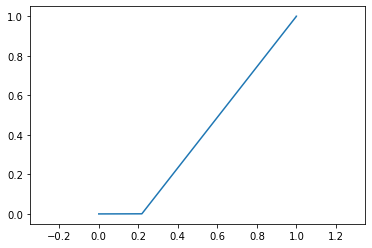

In [196]:
ht_moy = arbres.hauteur_m.mean()
type(arbres.hauteur_m)
hauteur_inf = arbres.where(arbres['hauteur_m']<ht_moy)

ht_inf = ~np.isnan(hauteur_inf.hauteur_m.values)

n = len(ht_inf)
n
lorenz = np.cumsum(np.sort(ht_inf)) / ht_inf.sum()
np.mean(lorenz)
lorenz = np.append([0],lorenz)
plt.axes().axis('equal')
xaxis = np.linspace(0-1/n,1+1/n,n+1)
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.show()

In [221]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.

S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
print(S)
gini = 2*S

gini

0.10878798023353997


0.21757596046707994

In [242]:
x = np.array([1,10,1,10,1,1,5,1,5,5])
y = np.array([6,4,6,4,6,4,6,4])
z = np.array([1,4,1,4,1,4,1,4])
x_df = pa.DataFrame(x)
y_df = pa.DataFrame(y)
z_df = pa.DataFrame(z)
print(f"var A:    {y_df.var(ddof=0)}")
print(f"var B:    {z_df.var(ddof=0)}")
type(x_df)
x_df.describe()

var A:    0    1.0
dtype: float64
var B:    0    2.25
dtype: float64


,0
count,10.000000
mean,4.000000
std,3.651484
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,10.000000


In [243]:
print(f"moy:    {x_df.mean()}")
print(f"med:    {x_df.median()}")
print(f"mod:    {x_df.mode()}")
print(f"var:    {x_df.var(ddof=0)}")
print(f"e-t:    {x_df.std(ddof=0)}")
print(f"skw:    {z_df.skew()}")
print(f"kur:    {x_df.kurtosis()}")

moy:    0    4.0
dtype: float64
med:    0    3.0
dtype: float64
mod:       0
0  1
var:    0    12.0
dtype: float64
e-t:    0    3.464102
dtype: float64
skw:    0    0.0
dtype: float64
kur:    0   -0.65625
dtype: float64
